import packages

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


loading and viewing dataset

In [205]:
dataframe=pd.read_csv('/content/SpotifyFeatures.csv')
dataframe.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [206]:
dataframe.shape

(232725, 18)

In [207]:
dataframe.describe()

popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

cleaning nan values

In [208]:
dataframe.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

exploratory analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

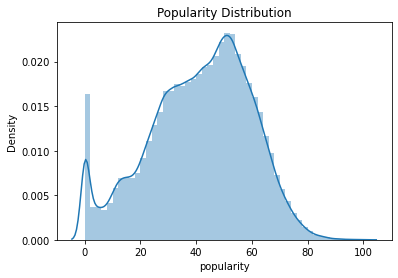

In [209]:
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution')

In [210]:
dataframe.corr()

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.381295      0.256564     0.002348   
acousticness       -0.381295      1.000000     -0.364546     0.011203   
danceability        0.256564     -0.364546      1.000000    -0.125781   
duration_ms         0.002348      0.011203     -0.125781     1.000000   
energy              0.248922     -0.725576      0.325807    -0.030550   
instrumentalness   -0.210983      0.316154     -0.364941     0.076021   
liveness           -0.167995      0.069004     -0.041684     0.023783   
loudness            0.363011     -0.690202      0.438668    -0.047618   
speechiness        -0.151076      0.150935      0.134560    -0.016171   
tempo               0.081039     -0.238247      0.021939    -0.028456   
valence             0.060076     -0.325798      0.547154    -0.141811   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.248922         -0.210983 -0.167995  0.363011    -0.151076   
acousticness     -0.725576          0.316154  0.069004 -0.690202     0.150935   
danceability      0.325807         -0.364941 -0.041684  0.438668     0.134560   
duration_ms      -0.030550          0.076021  0.023783 -0.047618    -0.016171   
energy            1.000000         -0.378957  0.192801  0.816088     0.145120   
instrumentalness -0.378957          1.000000 -0.134198 -0.506320    -0.177147   
liveness          0.192801         -0.134198  1.000000  0.045686     0.510147   
loudness          0.816088         -0.506320  0.045686  1.000000    -0.002273   
speechiness       0.145120         -0.177147  0.510147 -0.002273     1.000000   
tempo             0.228774         -0.104133 -0.051355  0.228364    -0.081541   
valence           0.436771         -0.307522  0.011804  0.399901     0.023842   

                     tempo   valence  
popularity        0.081039  0.060076  
acousticness     -0.238247 -0.325798  
danceability      0.021939  0.547154  
duration_ms      -0.028456 -0.141811  
energy            0.228774  0.436771  
instrumentalness -0.104133 -0.307522  
liveness         -0.051355  0.011804  
loudness          0.228364  0.399901  
speechiness      -0.081541  0.023842  
tempo             1.000000  0.134857  
valence           0.134857  1.000000

Text(0.5, 1.0, 'Popularity Based on Time Signature')

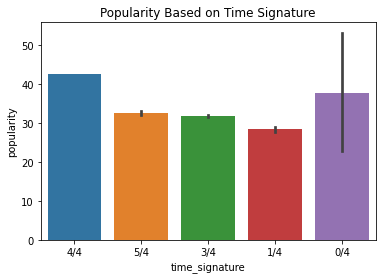

In [211]:
sns.barplot(x='time_signature',y='popularity',data=dataframe)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity based on Key')

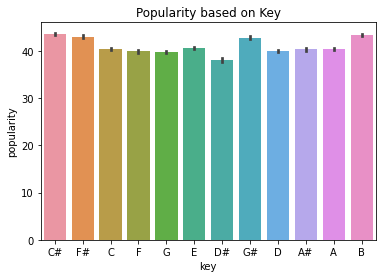

In [212]:
sns.barplot(x='key',y='popularity',data=dataframe)
plt.title('Popularity based on Key')

Text(0.5, 1.0, 'popularity based on mode')

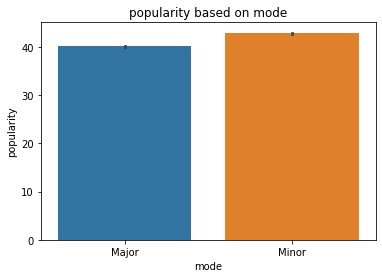

In [213]:
sns.barplot(x='mode',y='popularity',data=dataframe)
plt.title('popularity based on mode')

Text(0.5, 1.0, 'popularity based on mode and key')

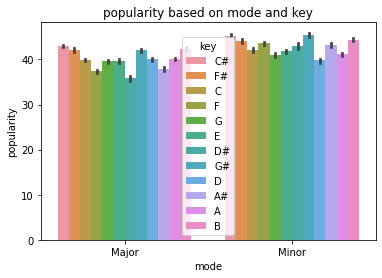

In [214]:
# combine key and mode in one bar plot
sns.barplot(x='mode',y='popularity',hue='key',data=dataframe)
plt.title('popularity based on mode and key') 

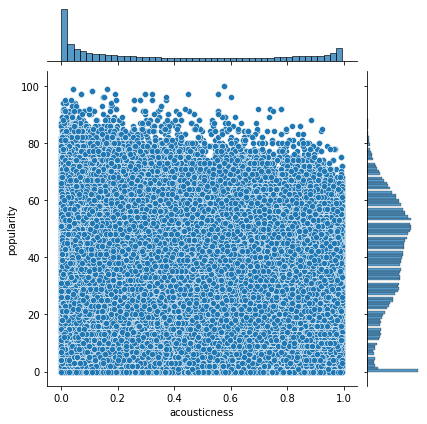

In [215]:
sns.jointplot(x='acousticness',y='popularity',data=dataframe)

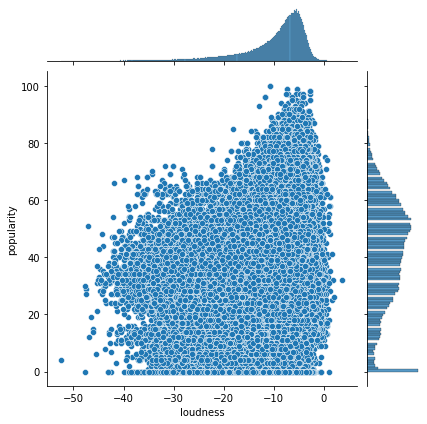

In [216]:
sns.jointplot(x='loudness',y='popularity',data=dataframe)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Acoustiness for songs with more than 30 Popularity')

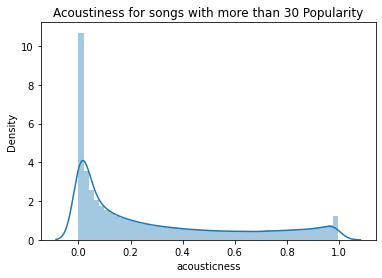

In [217]:
popular_above_30=dataframe[dataframe.popularity>30]
sns.distplot(popular_above_30['acousticness'])
plt.title('Acoustiness for songs with more than 30 Popularity')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Acoustiness for songs with less than 30 Popularity')

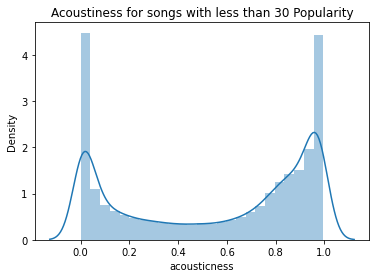

In [218]:
popular_below_30=dataframe[dataframe.popularity<30]
sns.distplot(popular_below_30['acousticness'])
plt.title('Acoustiness for songs with less than 30 Popularity')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Loudness for song with more than 30 popularity')

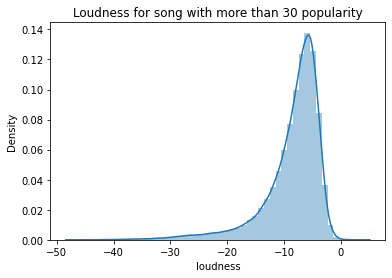

In [219]:
sns.distplot(popular_above_30['loudness'])
plt.title("Loudness for song with more than 30 popularity")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'loudness for song with less than 30')

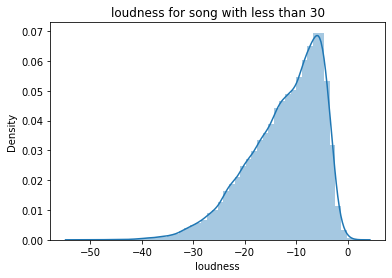

In [220]:
sns.distplot(popular_below_30['loudness'])
plt.title('loudness for song with less than 30')

From this analysis, there loudness" and acousticness features have medium-weak correlations with popularity. Furthermore, the distributions of loudness and acousticness differ for songs with more than 30 popularity vs. songs with less than 30 popularity. We plot a summary of all relationships between the features.

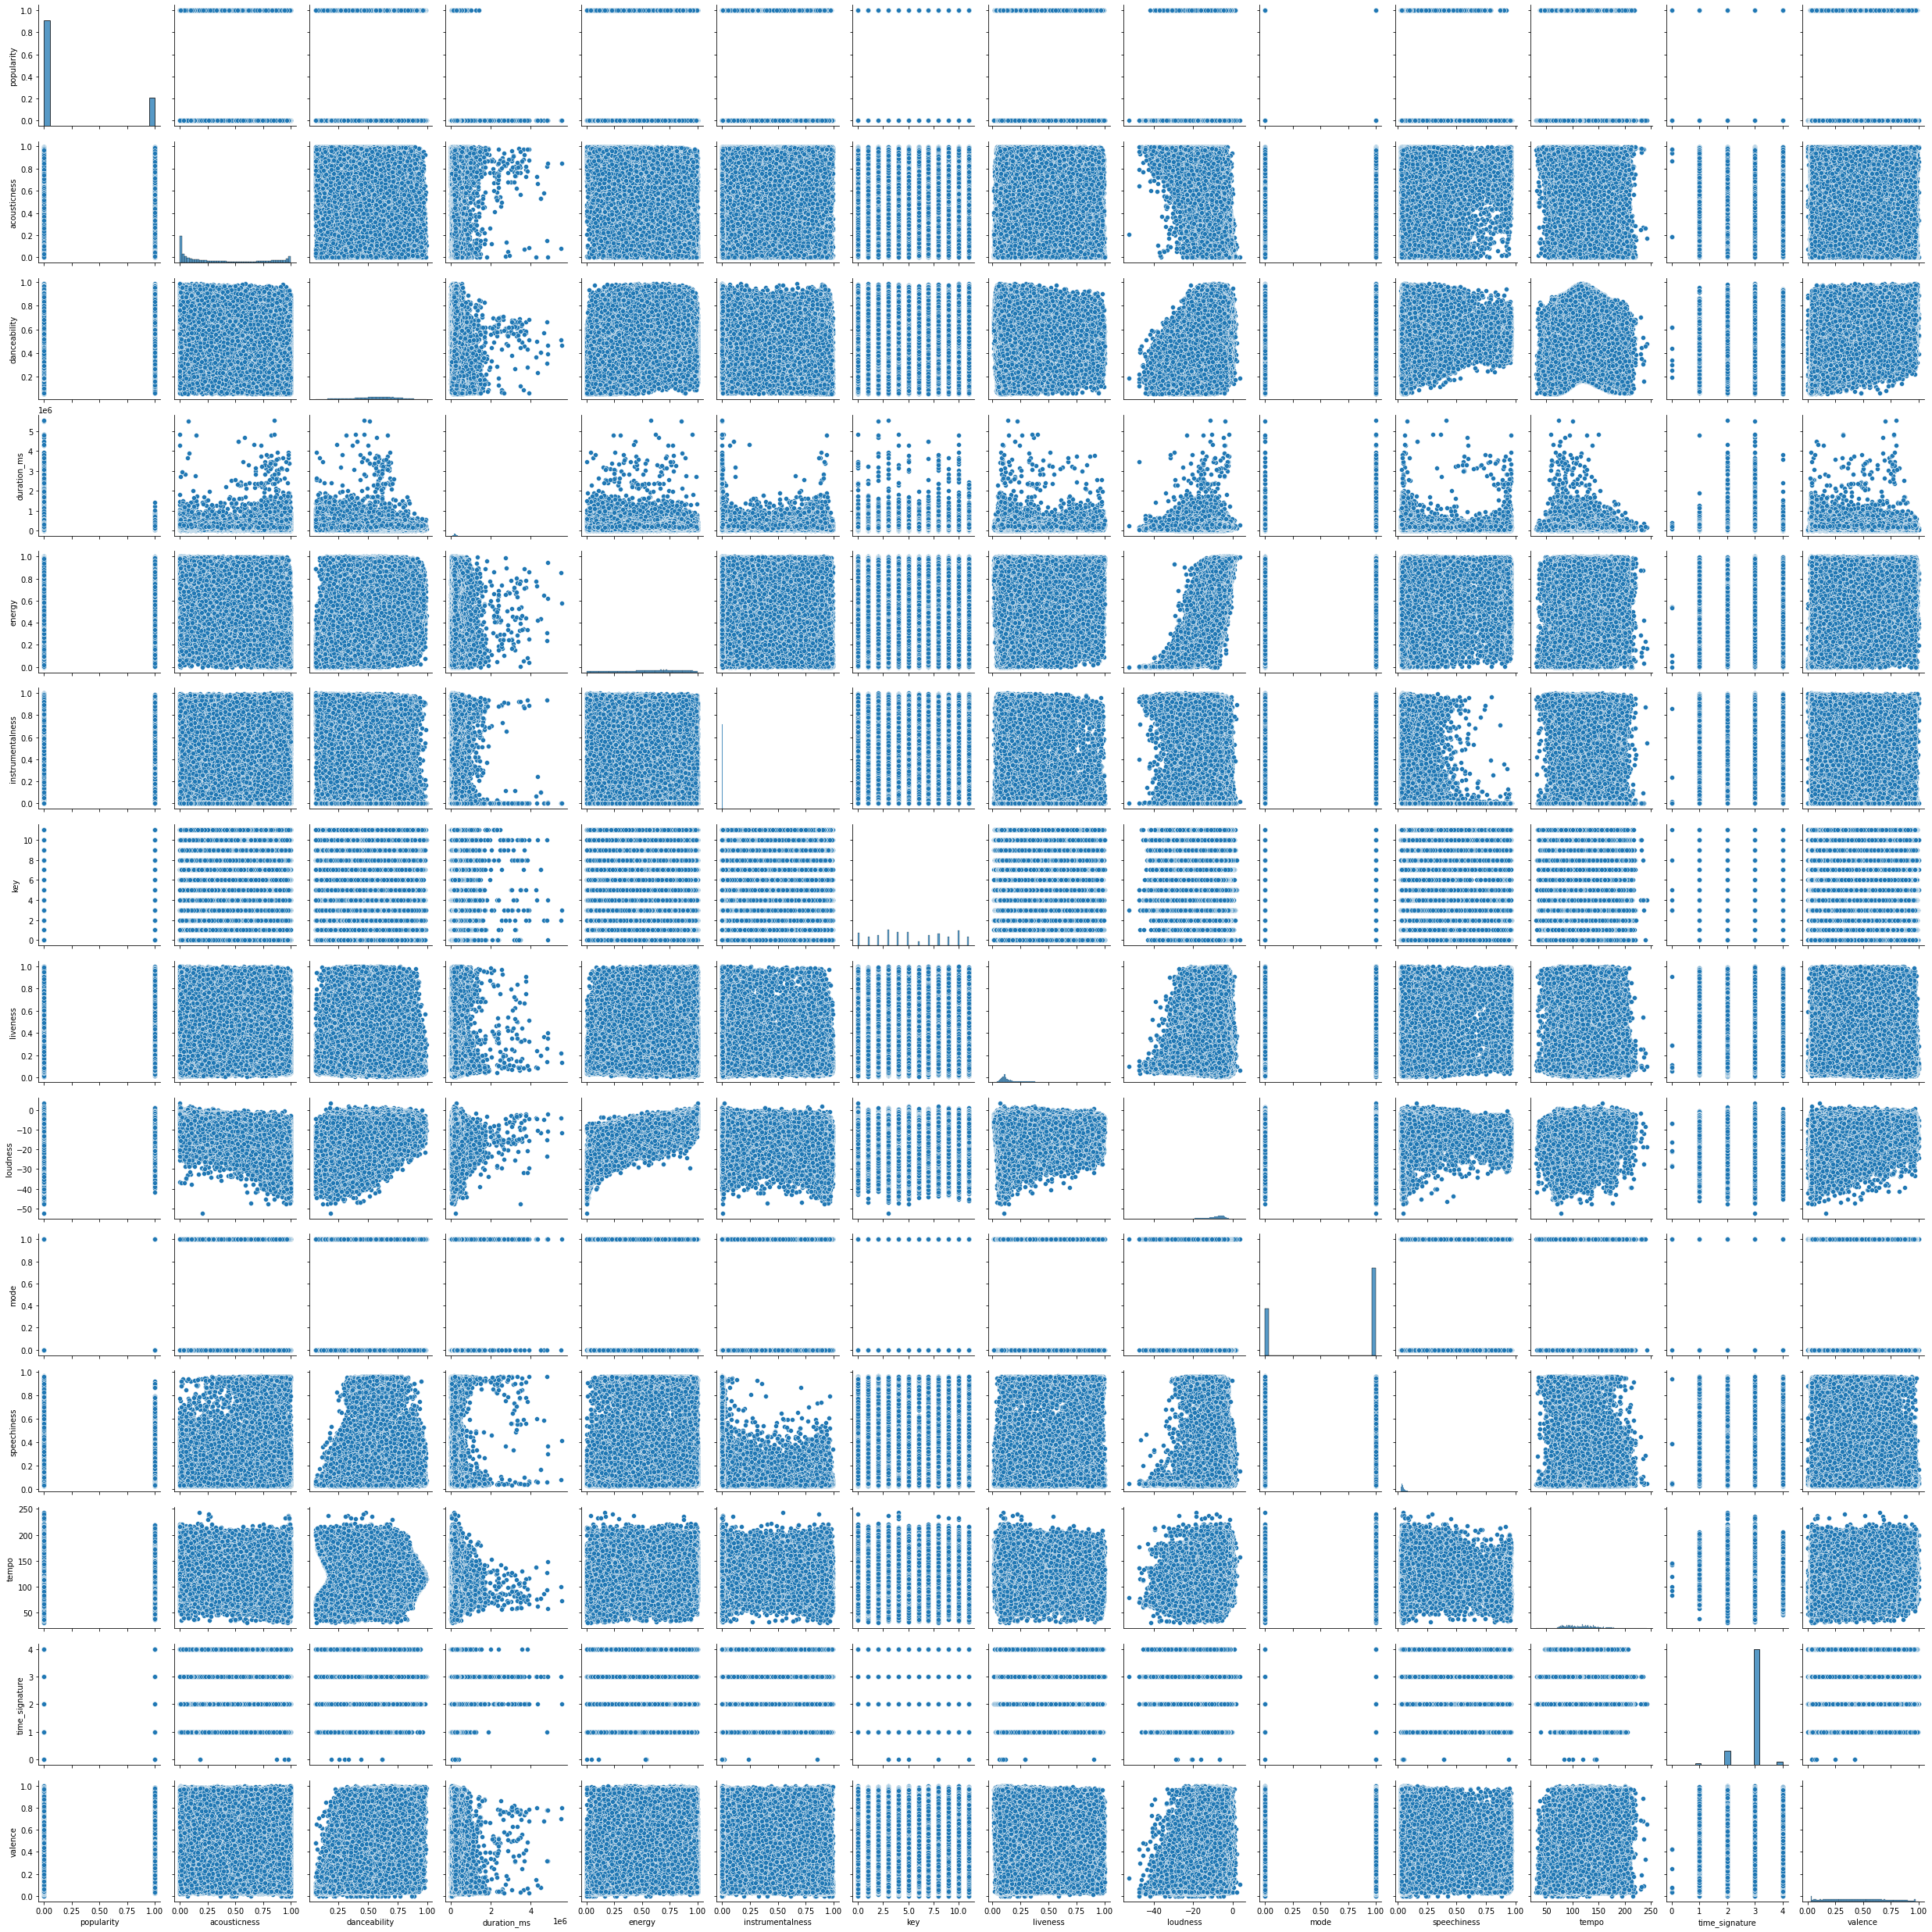

In [242]:
sns.pairplot(dataframe)

feature Engineering

In [222]:
# list_of_keys=dataframe['key'].unique()
# for i in range(len(list_of_keys)):
#   dataframe.loc[dataframe['key']==list_of_keys[i],'key']=i         
le=LabelEncoder()
dataframe['key']=le.fit_transform(dataframe['key'])
dataframe['time_signature']=le.fit_transform(dataframe['time_signature'])

In [223]:
# list_of_time_sinatures=dataframe['time_signature'].unique()
# for i in range(len(list_of_time_sinatures)):
#   dataframe.loc[dataframe['time_signature']==list_of_time_sinatures[i],'time_signature']=i

In [224]:
dataframe.replace({'mode':{'Major':1,'Minor':0}},inplace=True)

In [225]:
dataframe.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0        99373   0.910             0.000    4    0.3460    -1.828     1   
1       137373   0.737             0.000    9    0.1510    -5.559     0   
2       170267   0.131             0.000    3    0.1030   -13.879     0   
3       152427   0.326             0.000    4    0.0985   -12.178     1   
4        82625   0.225             0.123    8    0.2020   -21.150     1   

   speechiness    tempo  time_signature  valence  
0       0.0525  166.969               3    0.814  
1       0.0868  174.003               3    0.816  
2       0.0362   99.488               4    0.368  
3       0.0395  171.758               3    0.227  
4       0.0456  140.576               3    0.390

In [226]:
dataframe.loc[dataframe['popularity']<57,'popularity']=0
dataframe.loc[dataframe['popularity']>=57,'popularity']=1

In [227]:
dataframe['popularity'].value_counts()

0    183621
1     49104
Name: popularity, dtype: int64

above we divide the popularity in 25%(popular) and 75%(non popular)

model fitting and predicting

In [228]:
x=dataframe.drop(columns=['genre','artist_name','track_name','track_id','popularity'],axis=1)
y=dataframe['popularity']

In [229]:
print(x)
print(y)

        acousticness  danceability  duration_ms  energy  instrumentalness  \
0            0.61100         0.389        99373   0.910          0.000000   
1            0.24600         0.590       137373   0.737          0.000000   
2            0.95200         0.663       170267   0.131          0.000000   
3            0.70300         0.240       152427   0.326          0.000000   
4            0.95000         0.331        82625   0.225          0.123000   
...              ...           ...          ...     ...               ...   
232720       0.00384         0.687       326240   0.714          0.544000   
232721       0.03290         0.785       282447   0.683          0.000880   
232722       0.90100         0.517       166960   0.419          0.000000   
232723       0.26200         0.745       222442   0.704          0.000000   
232724       0.09730         0.758       323027   0.470          0.000049   

        key  liveness  loudness  mode  speechiness    tempo  time_signature

In [230]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

Logistic Regression

In [243]:
LR_model=LogisticRegression()
LR_model.fit(x_train,y_train)
LR_predict=LR_model.predict(x_test)
print(f"accuracy_LR:{accuracy_score(y_test,LR_predict)}")
print(f"AUC_LR:{roc_auc_score(y_test,LR_predict)}")
print(f"confusion matrix\n:{confusion_matrix(y_test,LR_predict)}")

accuracy_LR:0.7890213771618864
AUC_LR:0.5000882075503766
confusion matrix
:[[36723     1]
 [ 9819     2]]


Random Forest Classifier


In [244]:
RFC_model=RandomForestClassifier()
RFC_model.fit(x_train,y_train)
RFC_predict=RFC_model.predict(x_test)
print(f"Accucary_RFC:{accuracy_score(RFC_predict,y_test)}")
print(f"AUC_RFC:{roc_auc_score(RFC_predict,y_test)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test,RFC_predict)}")

Accucary_RFC:0.9373939198624986
AUC_RFC:0.936444855709184
Confusion matrix:
[[36208   516]
 [ 2398  7423]]


K-Nearest Neighbors Classifier

In [245]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)
KNN_predict=KNN_model.predict(x_test)
print(f"Accucary_KNN:{accuracy_score(KNN_predict,y_test)}")
print(f"AUC_KNN:{roc_auc_score(KNN_predict,y_test)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test,KNN_predict)}")

Accucary_KNN:0.7781716618326351
AUC_KNN:0.6600441615162014
Confusion matrix:
[[32111  4613]
 [ 5712  4109]]


Decision Tree Classifier

In [246]:
DT_model=DecisionTreeClassifier()
DT_model.fit(x_train,y_train)
DT_predict=DT_model.predict(x_test)
print(f"Accucary_DT:{accuracy_score(DT_predict,y_test)}")
print(f"AUC_DT:{roc_auc_score(DT_predict,y_test)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test,DT_predict)}")

Accucary_DT:0.8759909764743796
AUC_DT:0.8087772247126864
Confusion matrix:
[[32981  3743]
 [ 2029  7792]]


SVM

In [247]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]
training=dataframe.sample(frac=0.8,random_state=420)
training_svc=training.sample(10000)
x_svc=training_svc[features]
y_svc=training_svc['popularity']
x_train_svc,x_test_svc,y_train_svc,y_test_svc=train_test_split(x_svc,y_svc,test_size=0.2,random_state=42)

svm=SVC()
svm.fit(x_train_svc,y_train_svc)
svm_predict=svm.predict(x_test_svc)
print(f"accuracy_score_svm:{accuracy_score(svm_predict,y_test_svc)}")
print(f"confusion matrix:\n{confusion_matrix(svm_predict,y_test_svc)}")

accuracy_score_svm:0.801
confusion matrix:
[[1602  398]
 [   0    0]]


XGBOOST

In [239]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

print('XGBoost Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('AUC:',roc_auc_score(y_test, y_pred_xgb))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_xgb))
# Fine-tuning XGBoost Classifier hyperparameters
params = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [10],
    'min_child_weight': [1, 3, 5]
}

xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

y_pred_xgb = grid_search.predict(x_test)

print('XGBoost Classifier (Fine-tuned):')
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('AUC:', roc_auc_score(y_test, y_pred_xgb))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_xgb))

XGBoost Classifier:
Accuracy: 0.7901815447416478
AUC: 0.5107069246183518
Confusion Matrix:
 [[36512   212]
 [ 9554   267]]
XGBoost Classifier (Fine-tuned):
Accuracy: 0.7921581265442046
AUC: 0.5243791586975759
Confusion Matrix:
 [[36271   453]
 [ 9221   600]]


The Random Forest Classifier was the best performing algorithm with 93.7% accuracy and 93.4% AUC.